In [31]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

   # データ読み込み

## csvファイルから読み込み

In [3]:
Group = pd.read_csv('FIFA 2018 Statistics.csv')

## Gruop Stageのみを抽出

In [23]:
gs = Group.loc[Group['Round'] == 'Group Stage']

## 不要なカラムの削除

ここではDate, Opponent, Round, Goal Scored, PSO, Goals in PSOを削除

In [28]:
gs.drop(columns={'Date', 'Round','PSO', 'Goals in PSO'},inplace=True)
# 'Opponent','Goal Scored', 

C:\Users\yuta_fukai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Gruopごとに国を抽出

In [29]:
ga = gs.loc[(gs['Team'] == 'Russia') | (gs['Team'] == 'Saudi Arabia') | (
    gs['Team'] == 'Egypt') | (gs['Team'] == 'Uruguay')]
gb = gs.loc[(gs['Team'] == 'Morocco') | (gs['Team'] == 'Iran') | (
    gs['Team'] == 'Portugal') | (gs['Team'] == 'Spain')]
gc = gs.loc[(gs['Team'] == 'France') | (gs['Team'] == 'Australia') | (
    gs['Team'] == 'Peru') | (gs['Team'] == 'Denmark')]
gd = gs.loc[(gs['Team'] == 'Argentina') | (gs['Team'] == 'Iceland') | (
    gs['Team'] == 'Croatia') | (gs['Team'] == 'Nigeria')]
ge = gs.loc[(gs['Team'] == 'Cost a Rica') | (gs['Team'] == 'Serbia') | (
    gs['Team'] == 'Brazil') | (gs['Team'] == 'Switzerland')]
gf = gs.loc[(gs['Team'] == 'Germany') | (gs['Team'] == 'Mexico') | (
    gs['Team'] == 'Sweden') | (gs['Team'] == 'Korea Republic')]
gg = gs.loc[(gs['Team'] == 'Belgium') | (gs['Team'] == 'Panama') | (
    gs['Team'] == 'Tunisia') | (gs['Team'] == 'England')]
gh = gs.loc[(gs['Team'] == 'Colombia') | (gs['Team'] == 'Japan') | (
    gs['Team'] == 'Poland') | (gs['Team'] == 'Senegal')]

In [39]:
f = gf.groupby('Team').mean().round(3)
f.reset_index(inplace=True)

In [54]:
gf[['Team','Opponent','Goal Scored','Ball Possession %']]

,Team,Opponent,Goal Scored,Ball Possession %
18,Germany,Mexico,0,60
19,Mexico,Germany,1,40
22,Sweden,Korea Republic,1,52
23,Korea Republic,Sweden,0,48
54,Korea Republic,Mexico,1,41
55,Mexico,Korea Republic,2,59
56,Germany,Sweden,2,71
57,Sweden,Germany,1,29
80,Korea Republic,Germany,2,30
81,Germany,Korea Republic,0,70


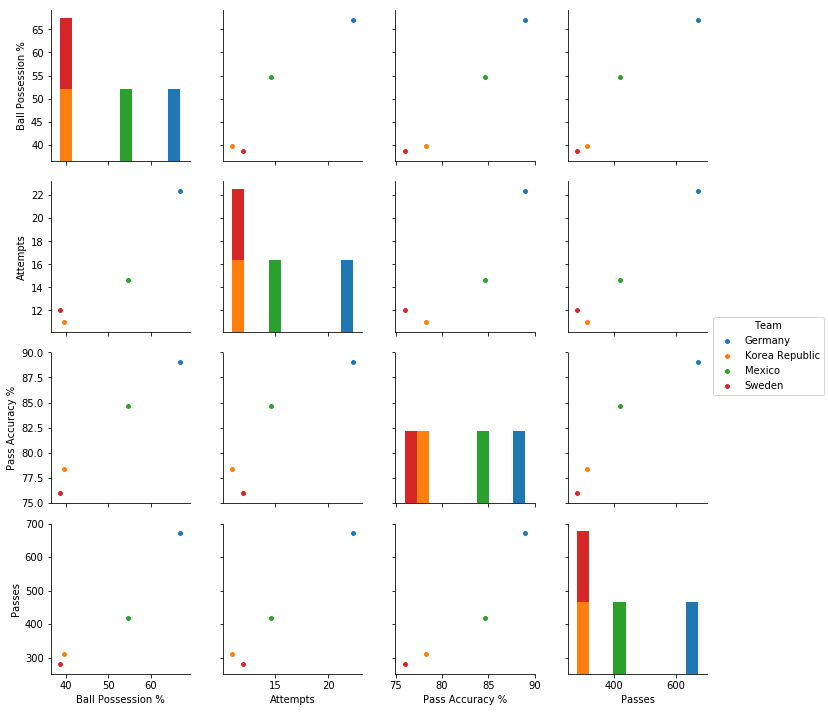

In [52]:
f_pass = f.loc[:, ['Team', 'Ball Possession %', 'Attempts','Pass Accuracy %', 'Passes']]
sns.pairplot(f_pass, hue='Team')